Average time to cancel a ride based on time and driver assignment

In [67]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv(r'D:\datascience\projects\Python-Projects\taxi_analysis\datasets\data_orders.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


Understand the distribution of data

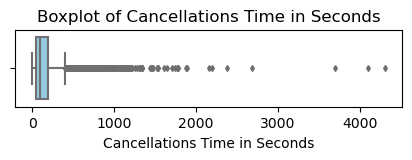

In [92]:
# Set figure size
plt.figure(figsize=(5, 1))

# Customize the boxplot
sns.boxplot(x=df['cancellations_time_in_seconds'], color='skyblue', fliersize=3, linewidth=1.5)

# Add title and labels
plt.title('Boxplot of Cancellations Time in Seconds')
plt.xlabel('Cancellations Time in Seconds')

# Show plot
plt.show()

Calculate upper limit and lower limit for outlier detection

In [61]:
upper_limit = df['cancellations_time_in_seconds'].mean() + 3*df['cancellations_time_in_seconds'].std()
lower_limit = df['cancellations_time_in_seconds'].mean() - 3*df['cancellations_time_in_seconds'].std()
print(f'upper limit : {upper_limit}')
print(f'lower limit : {lower_limit}')

upper limit : 797.9929108022121
lower limit : -482.20886810343006


select and drop outliers from the dataset

In [65]:
outliers = df.loc[(df['cancellations_time_in_seconds'] > upper_limit) | (df['cancellations_time_in_seconds'] < lower_limit)]


In [66]:
print(f'No of rows in the original dataset: {len(df)}')
print(f'No. of outliers : {len(outliers)}')
print(f'No of rows after outliers removal: {(len(df)) - (len(outliers))}')

No of rows in the original dataset: 10716
No. of outliers : 144
No of rows after outliers removal: 10572


In [57]:
df_new = df.drop(df[(df['cancellations_time_in_seconds'] > upper_limit) | (df['cancellations_time_in_seconds'] < lower_limit)].index)
print(len(df_new))

10572


Calculate the average cancellation rate per hour based on driver assignment 

In [73]:
df_new['hour'] = df_new['order_datetime'].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour )

In [87]:
grouped_after = df_new.groupby('is_driver_assigned_key')
cancelled_after_assigned = grouped_after.get_group(1)
cancelled_after_assigned = cancelled_after_assigned.groupby('hour')['cancellations_time_in_seconds'].mean().astype(int).reset_index(name= 'avg_cancellation_rate')

In [88]:
grouped_before = df_new.groupby('is_driver_assigned_key')
cancelled_before_assigned = grouped_before.get_group(0)
cancelled_before_assigned = cancelled_before_assigned.groupby('hour')['cancellations_time_in_seconds'].mean().astype(int).reset_index(name= 'avg_cancellation_rate')

Plot the distribution graph for each type

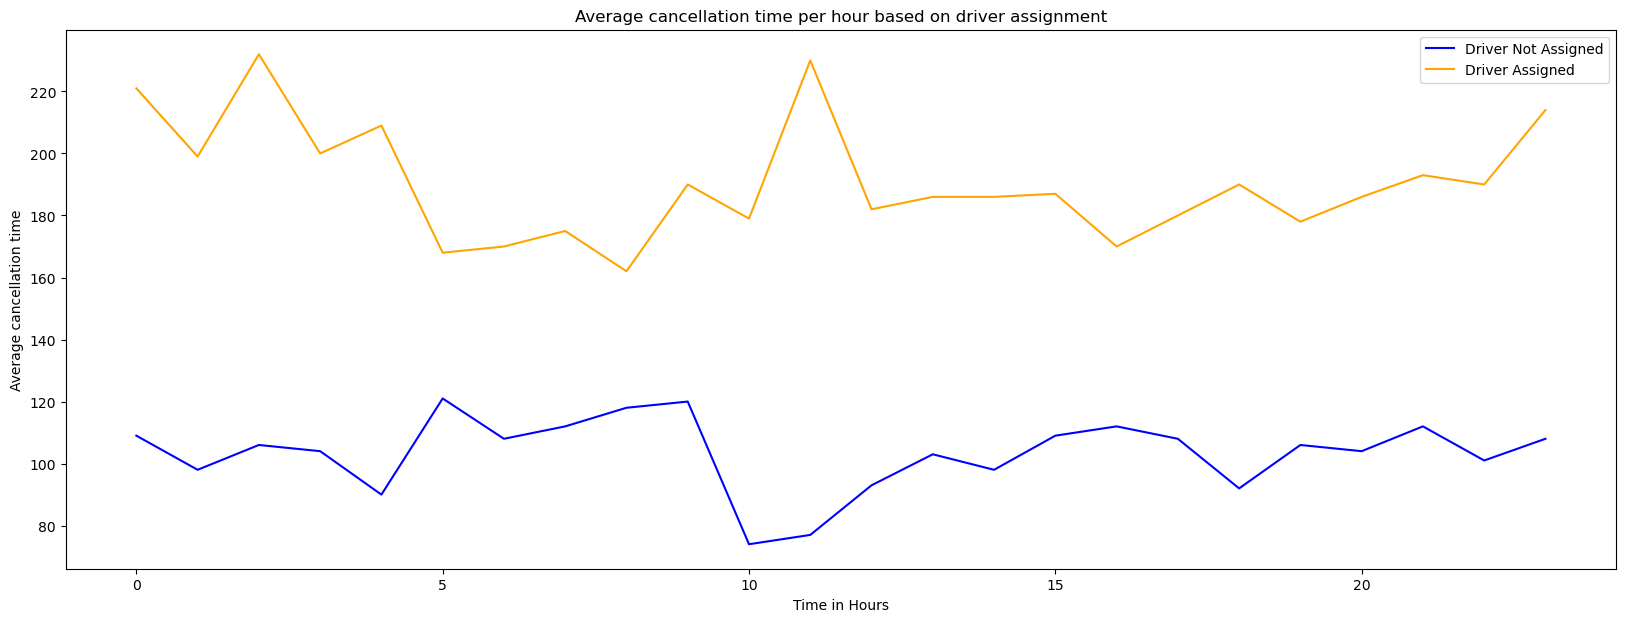

In [86]:
plt.figure(figsize=(20,7))
plt.plot(cancelled_before_assigned['hour'], cancelled_before_assigned['avg_cancellation_rate'], color = 'blue', label = 'Driver Not Assigned')
plt.plot(cancelled_after_assigned['hour'], cancelled_after_assigned['avg_cancellation_rate'],  color = 'orange', label = 'Driver Assigned')
plt.title('Average cancellation time per hour based on driver assignment')
plt.xlabel('Time in Hours')
plt.ylabel('Average cancellation time')
plt.legend()
plt.show()
